In [10]:
import torch
import torch.optim as optim
import torch.nn as nn
from DNModel import model
import numpy as np
import random
from data import get_dataset
from time import time
import os
from train import train, test, Average
from argparse import Namespace
import grad_cam
from PIL import Image

from torchvision import transforms

In [6]:
os.listdir('../images')[0]

'fffd00949.png'

In [22]:
grad_cam.gc(transform(Image.open('../images/fffd00949.png')).expand(3,-1,-1))

torch.Size([7, 256, 256])

In [27]:
torch.sigmoid(model(grad_cam.gc(transform(Image.open('../images/fffd00949.png')).expand(3,-1,-1)).unsqueeze(0)))

tensor([[9.9126e-01, 3.3322e-04, 6.8750e-03, 1.2860e-03, 6.1881e-03, 5.6334e-03]],
       grad_fn=<SigmoidBackward>)

In [42]:
ct_mean = 0.188
ct_std = 0.315
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([ct_mean], [ct_std], inplace=True)
    ])

In [28]:
print(9.9126e-01, 3.3322e-04, 6.8750e-03, 1.2860e-03, 6.1881e-03, 5.6334e-03)

0.99126 0.00033322 0.006875 0.001286 0.0061881 0.0056334


In [36]:
df = pd.read_csv('../label.csv')

In [31]:
import pandas as pd

In [38]:
df[df['ID'] == 'fffd00949']

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
4707,fffd00949,1,0,0,0,1,0


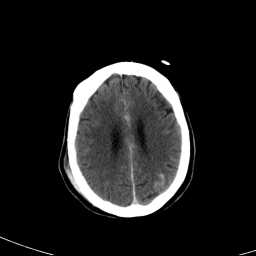

In [40]:
Image.open('../images/fffd00949.png')